In [2]:
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, GeoJSONDataSource, ColorBar, HoverTool, Legend, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer
from bokeh.models.glyphs import Line
from bokeh.palettes import Category10, Viridis
output_notebook()
import panel as pn
import panel.widgets as pnw
pn.extension()
from mesa import Agent, Model
from mesa.time import RandomActivation
import random
%matplotlib inline
# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt
import numpy as np
from mesa.space import MultiGrid
import networkx as nx
from mesa.space import NetworkGrid
import time, enum, math
from mesa.datacollection import DataCollector
from mesa import Agent, Model
from mesa.time import RandomActivation
import random
%matplotlib inline
# The below is needed for both notebooks and scripts
import matplotlib.pyplot as plt
import numpy as np
from mesa.space import MultiGrid
import networkx as nx
from mesa.space import NetworkGrid
import time, enum, math
from mesa.datacollection import DataCollector
import pandas as pd

Loading BokehJS ...

In [3]:
from mesa.time import BaseScheduler

In [101]:
class NetworkInfectionModel(Model):
    """A model for infection spread."""

    def __init__(self, N=10, new=2, pcontact=0.4, ptrans=0.5, avg_node_degree=3,
                 progression_period=3, progression_sd=2, recovery_rate=0.25, recovery_days=4,
                 recovery_sd=2, incubation_time = 6 , incubation_time_sd = 2, rate_infected = 1/6):
        #My shit here:
        self.num_nodes = N  
        self.pcontact=pcontact
        
        self.A_prob = np.random.rand(N,N)
        self.A = (self.A_prob<pcontact).astype('int')
        #----------------------------#
        #           Mine
        #
        #----------------------------#
        
        
        
        
        #self.num_nodes = N  
        #self.pcontact=pcontact
        """All parameters"""
        prob = avg_node_degree / self.num_nodes

        self.initial_outbreak_size = 1
        self.incubation_time = incubation_time
        self.incubation_time_sd = incubation_time_sd
        self.rate_infected = rate_infected
        self.recovery_sd = recovery_sd
        self.ptrans = ptrans
        self.recovery_rate = recovery_rate
        self.recovery_days = recovery_days
        
        
        """ Steps creating network: 
        + create network 
        + create grid 
        + create agent in the list of nodes 
        + use schedule to add new node in the grid 
        """
     
        self.G = nx.erdos_renyi_graph(n=self.num_nodes, p=prob)
        self.grid = NetworkGrid(self.G)
        self.schedule = RandomActivation(self) #activate the step of Agents in random orders
        self.running = True
        
        for i, node in enumerate(self.G.nodes):
            a = CovidAgent(i, self)
            self.schedule.add(a)
            if i<self.num_nodes:
                a.state=State.SUSCEPTIBLE
                self.grid.place_agent(a, node)
            else:
                a.state = State.INFECTED
                self.grid.place_agent(a, node)
            
        

        """2 types of agents: intra-agent and out-agent"""
        
        # Create out_agents: 
        
        # Create intra-agents
        

            
                
            
            #add agent
        """
        infected = np.random.choice([0,1], p=[0.98,0.02])
        if infected == 1:
            a.state = State.INFECTED
            a.recovery_time = self.get_recovery_time()
        """
            
            

        self.datacollector = DataCollector(            
            agent_reporters={"State": 'state'})

    def get_recovery_time(self):
        return int(self.random.normalvariate(self.recovery_days,self.recovery_sd))
    def get_incubation_time(self):
        return int(self.random.normalvariate(self.incubation_time, self.incubation_time_sd))
    def step(self):
        
        """Add new nodes: 
        + Add new nodes to the graph (add random)
        + create new grid 
        + add new nodes qua grid (schedule)
        + place agent
        """
        
        #-----success doan o tren ------# 


        """
        look not bad, not work but it's not bad
            neig = self.grid.get_all_cell_contents()

            if any(map(self.grid.is_cell_empty, neig)):
                empty = list(filter(self.grid.is_cell_empty, neig))
                pos = random.choice(empty)
                new_bug = CovidAgent(last + i, self)
                new_bug.state = State.INFECTED
                self.schedule.add(new_bug)
                self.grid.place_agent(new_bug, pos)
        """
            
                    

       
        
        
        self.datacollector.collect(self)
        self.schedule.step()
       
        
        
  
        """
        --------------------------------------------------------------------------------
        """     
        """
        for i in range(10):
            neig = self.grid.get_neighbors(self.agent.pos, False)

            if any(map(self.grid.is_cell_empty, neig)):
                empty = list(filter(self.grid.is_cell_empty, neig))
                pos = random.choice(empty)
                last = self.num_nodes
                new_bug = CovidAgent(last + 1, self)
                new_bug.state = State.INFECTED
                self.grid.place_agent(new_bug, pos)
                self.schedule.add(new_bug)
                self.number_of_bug += 1
            else:
                pos = self.grid.is_cell_empty
        """
        

In [102]:
class State(enum.IntEnum):
    SUSCEPTIBLE = 0
    EXPOSED = 1
    INFECTED = 2

class CovidAgent(Agent):
    """This is a class of agents living inside the territory of Australia, each of them have been affected by imported agents"""
    def __init__(self, unique_id, model):
        super().__init__(unique_id,model)
        self.state = State.SUSCEPTIBLE 
        self.number_of_contacts = np.random.randint(0,50)
        self.infection_time = 0
        self.incubation_time = 2
        self.recovery_time = 4
        self.rate_infected = 0.8
    def step(self):
        """Take a step forwards in time in 2 condition"""
        self.status()
        self.move()
        self.contact()
   
    def move(self):


        possible_steps = [node for node in self.model.grid.get_neighbors(self.pos, include_center=False) if self.model.grid.is_cell_empty(node)]
        if len(possible_steps) > 0:
            new_position = self.random.choice(possible_steps)                 
            self.model.grid.move_agent(self, new_position)
        


    
    
    def status(self):
        """Check infection status 1 if loop for exposed condition and 1 for infected condition"""

        if self.state == State.EXPOSED: 
            tmuy = self.model.schedule.time - self.incubation_time
            if tmuy >= 3: 
                self.state=State.INFECTED
                """
                successrate = self.rate_infected
                infect = np.random.choice([1,0], p=[successrate, 1-successrate])
                if infect == 0: #if v=0 then the transmission contact becomes ineffective 
                    self.state = State.INFECTED
                """
                
                """
                elif infect ==1: 
                    self.state =State.SUSCEPTIBLE
                """    
                
        
                
        if self.state == State.INFECTED: 
            self.contact()
            t = self.model.schedule.time -self.infection_time
            if t >= 4:          
                self.state = State.SUSCEPTIBLE

    def contact(self):
        """Find close contacts and infect"""
        """
        cellmates = self.model.grid.get_cell_list_contents([self.pos])       
        if len(cellmates) > 1:
            for other in cellmates:
                if self.random.random() > model.ptrans:
                    continue
                if self.state is State.INFECTED and other.state is State.SUSCEPTIBLE:                    
                    other.state = State.EXPOSED
                    
                    other.incubation_time = self.model.get_incubation_time()
        """
        neighbors_nodes = self.model.grid.get_neighbors(self.pos, include_center=False)
        susceptile_neighbors = self.model.grid.get_cell_list_contents(neighbors_nodes)
        for other in susceptile_neighbors: 
            if self.state is State.INFECTED and other.state is State.SUSCEPTIBLE:  
                if self.random.random() <model.ptrans:
                    other.state = State.EXPOSED
                    other.infection_time = self.model.schedule.time
                    other.incubation_time = self.model.get_incubation_time()
    

        """
        neighbors_nodes = self.model.grid.get_neighbors(self.pos, include_center=False)
        susceptible_neighbors = [
            agent
            for agent in self.model.grid.get_cell_list_contents(neighbors_nodes)
            if agent.state is State.SUSCEPTIBLE
        ]
        for a in susceptible_neighbors:
            if self.random.random() < model.ptrans:
                a.state = State.EXPOSED
                a.incubation_time = self.model.get_incubation_time()
        """
        
    
            

In [103]:
from mesa.datacollection import DataCollector
N=100

model = NetworkInfectionModel(N,ptrans=0.7)

model.step()


model_df = model.datacollector.get_model_vars_dataframe()
agent_df = model.datacollector.get_agent_vars_dataframe()

In [104]:
agent_df

State
Step AgentID       
0    0            0
     1            0
     2            0
     3            0
     4            0
...             ...
     95           0
     96           0
     97           0
     98           0
     99           0

[100 rows x 1 columns]

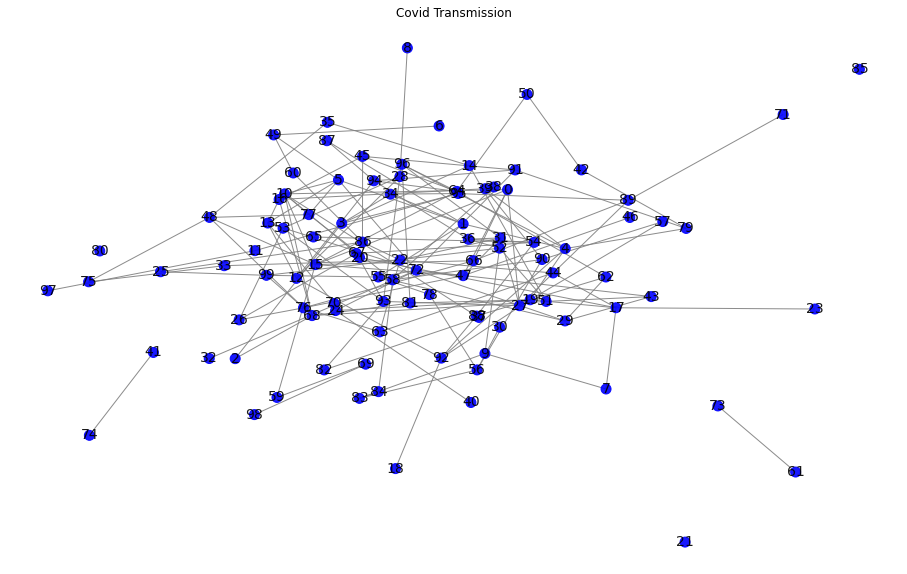

In [105]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap = ListedColormap(["blue", "orange", "red",])

def plot_grid(model,fig,layout='spring',title=''):
    graph = model.G
    if layout == 'kamada-kawai':      
        pos = nx.kamada_kawai_layout(graph)  
    elif layout == 'circular':
        pos = nx.circular_layout(graph)
    else:
        pos = nx.spring_layout(graph, iterations=5, seed=8)  
    plt.clf()
    ax=fig.add_subplot()
    states = [int(i.state) for i in model.grid.get_all_cell_contents()]
    colors = [cmap(i) for i in states]

    nx.draw(graph, pos, node_size=100, edge_color='gray', node_color=colors, #with_labels=True,
            alpha=0.9,font_size=14,ax=ax,with_labels=True)
    ax.set_title(title)
    return
steps=10
fig,ax=plt.subplots(1,1,figsize=(16,10))

model = NetworkInfectionModel(100,2, ptrans=0.1)

model.step()
f=plot_grid(model,fig,layout='spring',title="Covid Transmission")

In [106]:
model.G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

In [110]:
import panel as pn 
pn.extension()
def run_model(pop,  ptrans, degree, steps, delay, layout):

    model = NetworkInfectionModel(pop,Add=2,ptrans=ptrans, avg_node_degree=degree)

    fig1 = plt.Figure(figsize=(8,6))
    grid_pane.object = fig1
    fig2 = plt.Figure(figsize=(8,6))
    ax2=fig2.add_subplot(1,1,1,label='b')
    states_pane.object = fig2

    #step through the model and plot at each step
    for i in range(steps):
        model.step(i)
        plot_grid(model,fig1,title='step=%s' %i, layout=layout)        
        grid_pane.param.trigger('object')
        ax2.clear()
        plot_states(model,ax2)
        ax2.set_xlim(0,steps)        
        states_pane.param.trigger('object')    
        time.sleep(delay)
    plt.clf()
    

grid_pane    = pn.pane.Matplotlib()
states_pane  = pn.pane.Matplotlib()
go_btn       = pnw.Button(name='run',width=100,button_type='primary')
pop_input    = pnw.IntSlider(name='population',value=100,start=10,end=1000,step=10,width=100)
ptrans_input = pnw.FloatSlider(name='prob. trans',value=0.1,width=100)
degree_input = pnw.IntSlider(name='node degree',value=3,start=1,end=10,width=100)
steps_input  = pnw.IntSlider(name='steps',value=20,start=5,end=100,width=100)
delay_input  = pnw.FloatSlider(name='delay',value=.2,start=0,end=3,step=.2,width=100)
layout_input = pnw.Select(name='layout',options=['spring','circular','kamada-kawai'],width=100)
widgets      = pn.WidgetBox(go_btn,pop_input,steps_input,delay_input,layout_input)

def execute(event):
    #run the model with widget options
    run_model(pop_input.value,  ptrans_input.value, degree_input.value,steps_input.value, delay_input.value, layout_input.value)
go_btn.param.watch(execute, 'clicks')

pn.Row(pn.Column(widgets),grid_pane,states_pane,sizing_mode='stretch_width')

Traceback (most recent call last):
 File "C:\Users\Acer\anaconda3\lib\site-packages\pyviz_comms\__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "C:\Users\Acer\anaconda3\lib\site-packages\panel\viewable.py", line 258, in _on_msg
 patch.apply_to_document(doc, comm.id)
 File "C:\Users\Acer\anaconda3\lib\site-packages\bokeh\protocol\messages\patch_doc.py", line 100, in apply_to_document
 doc._with_self_as_curdoc(lambda: doc.apply_json_patch(self.content, setter))
 File "C:\Users\Acer\anaconda3\lib\site-packages\bokeh\document\document.py", line 1169, in _with_self_as_curdoc
 return f()
 File "C:\Users\Acer\anaconda3\lib\site-packages\bokeh\protocol\messages\patch_doc.py", line 100, in <lambda>
 doc._with_self_as_curdoc(lambda: doc.apply_json_patch(self.content, setter))
 File "C:\Users\Acer\anaconda3\lib\site-packages\bokeh\document\document.py", line 397, in apply_json_patch
 self._trigger_on_message(event_json["msg_type"], event_json["msg_data"])
 File "C:\Users\Acer\anaconda3\lib\site-packages\bokeh\document\document.py", line 686, in _trigger_on_message
 cb(msg_data)
 File "C:\Users\Acer\anaconda3\lib\site-packages\bokeh\document\document.py", line 355, in apply_json_event
 model._trigger_event(event)
 File "C:\Users\Acer\anaconda3\lib\site-packages\bokeh\util\callback_manager.py", line 85, in _trigger_event
 self._document._with_self_as_curdoc(invoke)
 File "C:\Users\Acer\anaconda3\lib\site-packages\bokeh\document\document.py", line 1169, in _with_self_as_curdoc
 return f()
 File "C:\Users\Acer\anaconda3\lib\site-packages\bokeh\util\callback_manager.py", line 74, in invoke
 callback(event)
 File "C:\Users\Acer\anaconda3\lib\site-packages\panel\widgets\button.py", line 108, in _server_click
 self._change_event(doc)
 File "C:\Users\Acer\anaconda3\lib\site-packages\panel\reactive.py", line 204, in _change_event
 self._process_events(events)
 File "C:\Users\Acer\anaconda3\lib\site-packages\panel\reactive.py", line 187, in _process_events
 self.param.set_param(**self._process_property_change(events))
 File "C:\Users\Acer\anaconda3\lib\site-packages\param\parameterized.py", line 1472, in set_param
 self_._batch_call_watchers()
 File "C:\Users\Acer\anaconda3\lib\site-packages\param\parameterized.py", line 1611, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "C:\Users\Acer\anaconda3\lib\site-packages\param\parameterized.py", line 1573, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "<ipython-input-110-ec78acc2af4f>", line 39, in execute
 run_model(pop_input.value, ptrans_input.value, degree_input.value,steps_input.value, delay_input.value, layout_input.value)
 File "<ipython-input-110-ec78acc2af4f>", line 5, in run_model
 model = NetworkInfectionModel(pop,Add=2,ptrans=ptrans, avg_node_degree=degree)
TypeError: __init__() got an unexpected keyword argument 'Add'

Row(sizing_mode='stretch_width')
    [0] Column
        [0] WidgetBox
            [0] Button(button_type='primary', name='run', width=100)
            [1] IntSlider(end=1000, name='population', start=10, step=10, value=100, value_throttled=100, width=100)
            [2] IntSlider(end=100, name='steps', start=5, value=20, value_throttled=20, width=100)
            [3] FloatSlider(end=3, name='delay', step=0.2, value=0.2, value_throttled=0.2, width=100)
            [4] Select(name='layout', options=['spring', 'circular', ...], value='spring', width=100)
    [1] Matplotlib(None)
    [2] Matplotlib(None)

In [112]:
import pandas as pd
def get_column_data(model):
    #pivot the model dataframe to get states count at each step
    agent_state = model.datacollector.get_agent_vars_dataframe()
    X = pd.pivot_table(agent_state.reset_index(),index='Step',columns='State',aggfunc=np.size,fill_value=0)    
    labels = ['Susceptible','Exposed','Infected']
    X.columns = labels[:len(X.columns)]
    return X
    
def plot_states(model,ax):    
    steps = model.schedule.steps
    X = get_column_data(model)
    X.plot(ax=ax,lw=3,alpha=0.8)
    return f
pop=200
steps=50
st=time.time()
model = NetworkInfectionModel(pop,ptrans=0.5)
for i in range(steps):
    model.step()
print("Running time:{}".format(time.time()-st))
agent_state = model.datacollector.get_agent_vars_dataframe()
print (get_column_data(model)[:50])

Running time:0.18651628494262695
      Susceptible
Step             
0             200
1             200
2             200
3             200
4             200
5             200
6             200
7             200
8             200
9             200
10            200
11            200
12            200
13            200
14            200
15            200
16            200
17            200
18            200
19            200
20            200
21            200
22            200
23            200
24            200
25            200
26            200
27            200
28            200
29            200
30            200
31            200
32            200
33            200
34            200
35            200
36            200
37            200
38            200
39            200
40            200
41            200
42            200
43            200
44            200
45            200
46            200
47            200
48            200
49            200


No handles with labels found to put in legend.


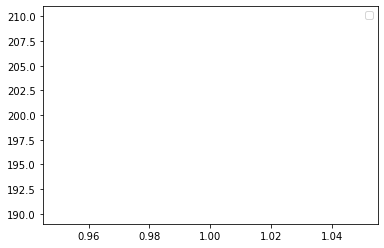

In [365]:
plt.plot(get_column_data(model))
plt.legend()

<IPython.core.display.Javascript object>


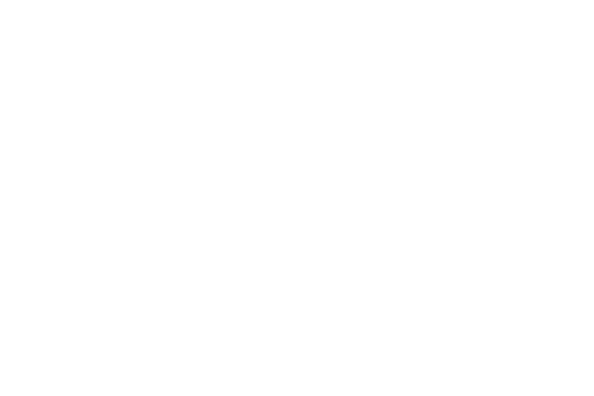

In [90]:
%matplotlib notebook
fig1 = plt.Figure(figsize=(8,6))

def run_model(pop,  ptrans, degree, steps, delay, layout,i):

    model = NetworkInfectionModel(pop,ptrans=ptrans, avg_node_degree=degree)

    fig1 = plt.Figure(figsize=(8,6))
    grid_pane.object = fig1
    

    #step through the model and plot at each step
    """Problem is plots are stacking each others. Need to clear plot  when adding new one
    """

   
    model.step(i) #nearly good

    plot_grid(model,fig1,title='step=%s' %i, layout=layout)        
    grid_pane.param.trigger('object')

    time.sleep(delay)
    plt.clf()
    
ani = matplotlib.animation.FuncAnimation(fig, run_model(100,0.3,3,10,1,'spring',5), frames=60)
plt.show()

In [84]:
G = nx.erdos_renyi_graph(100, 0.0003)

grid = NetworkGrid(G)
#-----success doan o tren ------# 
neig = grid.get_all_cell_contents()

if any(map(grid.is_cell_empty, neig)):
    empty = list(filter(grid.is_cell_empty, neig))
    pos = random.choice(empty)

In [85]:
grid.G.add_node(100+1)

In [86]:
grid.G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 101))

In [87]:
grid.G.nodes[10]

{'agent': []}

In [88]:
grid.G.nodes[10]["agent"].append("time")

In [89]:
list_of_random_nodes = random.sample(grid.G.nodes(), 20)

In [90]:
np.size(list_of_random_nodes)

20

In [91]:
list_nodes = list(grid.G.nodes)

In [92]:
list_nodes[-1]

101

In [97]:
grid.G.add_node(1000)

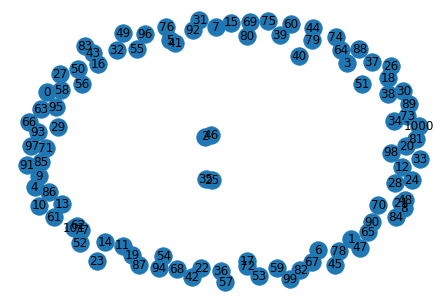

In [100]:
nx.draw(G,with_labels=True)